In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd

def make_pivot_table_hypergate(df_hypergate,dataset = 'large PBMC', cell_type_key = 'cluster cell_type_lvl_1'):
    df_hypergate = df_hypergate.rename(columns={'cell_type': 'celltype'})
    df_hypergate['dataset'] = dataset
    df_hypergate['model'] = 'Hypergate'
    df_hypergate = df_hypergate.pivot_table(
    index=['sample', 'celltype', 'set_size', 'ratio', 'train_ratio', 'time', 'model','dataset'],
    columns='score',
    values='value'
        ).reset_index()
    df_hypergate = df_hypergate.drop(columns=['train_ratio'])
    df_hypergate.columns.name = None
    df_hypergate['cell_type_key'] = cell_type_key
    df_hypergate = df_hypergate.rename(columns={'set_size': 'set'})
    return df_hypergate

In [6]:
base_path = os.getcwd()
pre = 'rev10_NatComm'
base_save_path_rev10 = 'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev10_NatComm'

### ratio 1:1

In [7]:
base_path_1to1 = 'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev09_NatComm\\input\\ratio_1to1'

In [8]:
#large PBMC lvl1
df_Hypergate_largePBMC_lvl1 = pd.read_csv(os.path.join(base_path_1to1,'HIV_data_annotated_final_cluster cell_type_lvl_1_hypergate.csv'))
df_Hypergate_largePBMC_lvl1 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_largePBMC_lvl1,
                                                         dataset = 'large PBMC',
                                                        cell_type_key = 'cluster cell_type_lvl_1')

#large PBMC lvl1
df_Hypergate_largePBMC_lvl2 = pd.read_csv(os.path.join(base_path_1to1,'HIV_data_annotated_final_cluster cell_type_lvl_2_hypergate.csv'))
df_Hypergate_largePBMC_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_largePBMC_lvl2,
                                                         dataset = 'large PBMC',
                                                        cell_type_key = 'cluster cell_type_lvl_2')

df_Hypergate_Oetjen_lvl2 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl2_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl2,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl2')

df_Hypergate_Oetjen_lvl3 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl3_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl3 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl3,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl3')

df_Hypergate_Oetjen_lvl4 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl4_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl4 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl4,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl4')

df_Hypergate_Oetjen_lvl5 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl5_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl5 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl5,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl5')

df_Hypergate_smallDC_lvl1 = pd.read_csv(os.path.join(base_path_1to1,'mono_merge_annotated_cell_types_hypergate(2).csv'))
df_Hypergate_smallDC_lvl1 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_smallDC_lvl1,
                                                         dataset = 'small DC',
                                                        cell_type_key = 'cell_types')

df_Hypergate_smallDC_lvl2 = pd.read_csv(os.path.join(base_path_1to1,'mono_merge_annotated_cell_types_lvl2_hypergate(2).csv'))
df_Hypergate_smallDC_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_smallDC_lvl2,
                                                         dataset = 'small DC',
                                                        cell_type_key = 'cell_types_lvl2')

In [27]:
# 4 methods to compare
df_Hypergate_1to1 = pd.concat([
    df_Hypergate_largePBMC_lvl1,
    df_Hypergate_largePBMC_lvl2,
    df_Hypergate_Oetjen_lvl2,
    df_Hypergate_Oetjen_lvl3,
    df_Hypergate_Oetjen_lvl4,
    df_Hypergate_Oetjen_lvl5,
    df_Hypergate_smallDC_lvl1,
    df_Hypergate_smallDC_lvl2
], ignore_index=True)
df_linSVM_1to1 = pd.read_csv(os.path.join(base_path_1to1,'performance_linearSVM_ratio_1_to_1.csv'),index_col=0)
df_linSVM_1to1['dataset'] = df_linSVM_1to1['dataset'].replace('cytof_data_tmp', 'Oetjen')

df_CG_1to1 = pd.read_csv(os.path.join(base_path_1to1,'performance_cg_ratio_1_to_1.csv'),index_col=0) 
df_CG_1to1 = df_CG_1to1.rename(columns={'cluster': 'celltype'})
df_CG_1to1 = df_CG_1to1.drop(columns=['hierarchy'])

df_rbfSVM_1to1 = pd.read_csv(os.path.join(base_path_1to1,'performance_RBFSVM_ratio_1_to_1.csv'),index_col=0) 
df_rbfSVM_1to1['dataset'] = df_rbfSVM_1to1['dataset'].replace('cytof_data_tmp', 'Oetjen')

df_all_1to1 = pd.concat([df_Hypergate_1to1,df_linSVM_1to1,df_CG_1to1,df_rbfSVM_1to1])

In [36]:
df_all_1to1_test = df_all_1to1[(df_all_1to1['set'] == 'test') & ((df_all_1to1['model'] == 'ConvexGating') | (df_all_1to1['model'] == 'Hypergate'))]
df_all_1to1_test
df_all_1to1_test['dataset_celltypekey'] = list(df_all_1to1_test['dataset'].values + '_' + df_all_1to1_test['cell_type_key'].values)

C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_27136\2927849078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_1to1_test['dataset_celltypekey'] = list(df_all_1to1_test['dataset'].values + '_' + df_all_1to1_test['cell_type_key'].values)


In [37]:
df_melted_test = pd.melt(
    df_all_1to1_test,
    id_vars=['dataset_celltypekey', 'celltype', 'model', 'set'],
    value_vars=['precision', 'recall', 'f1'],
    var_name='score_type',
    value_name='score_value'
)

In [82]:
custom_palette = {
    'Hypergate': "#6b6ca3",      # blue
    'ConvexGating':  "#87bcbd",   # orange
    'linSVM': '#2ca02c',         # green
    'rbfSVM': '#d62728'          # red
}

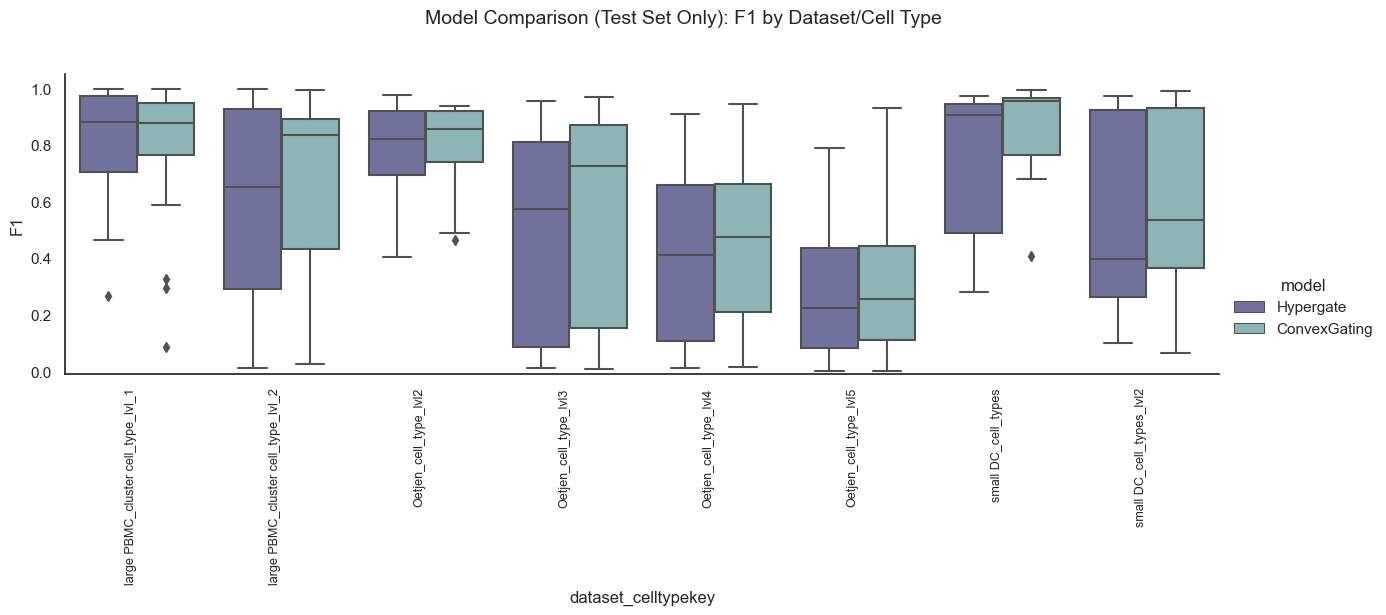

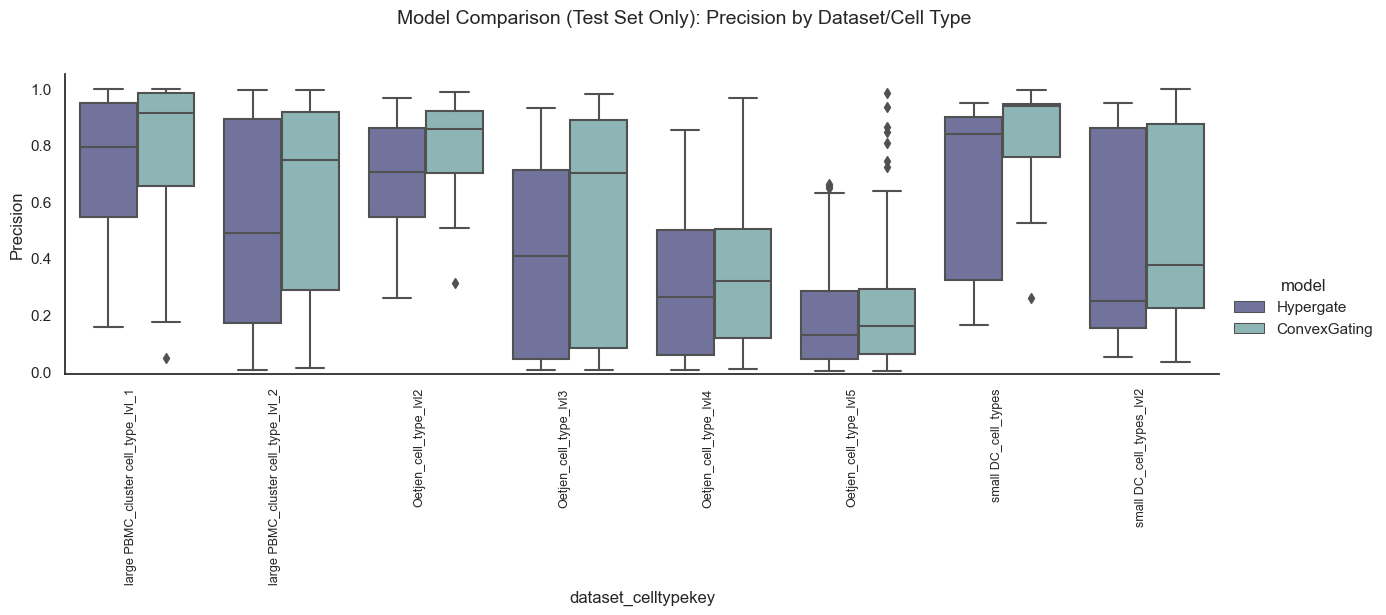

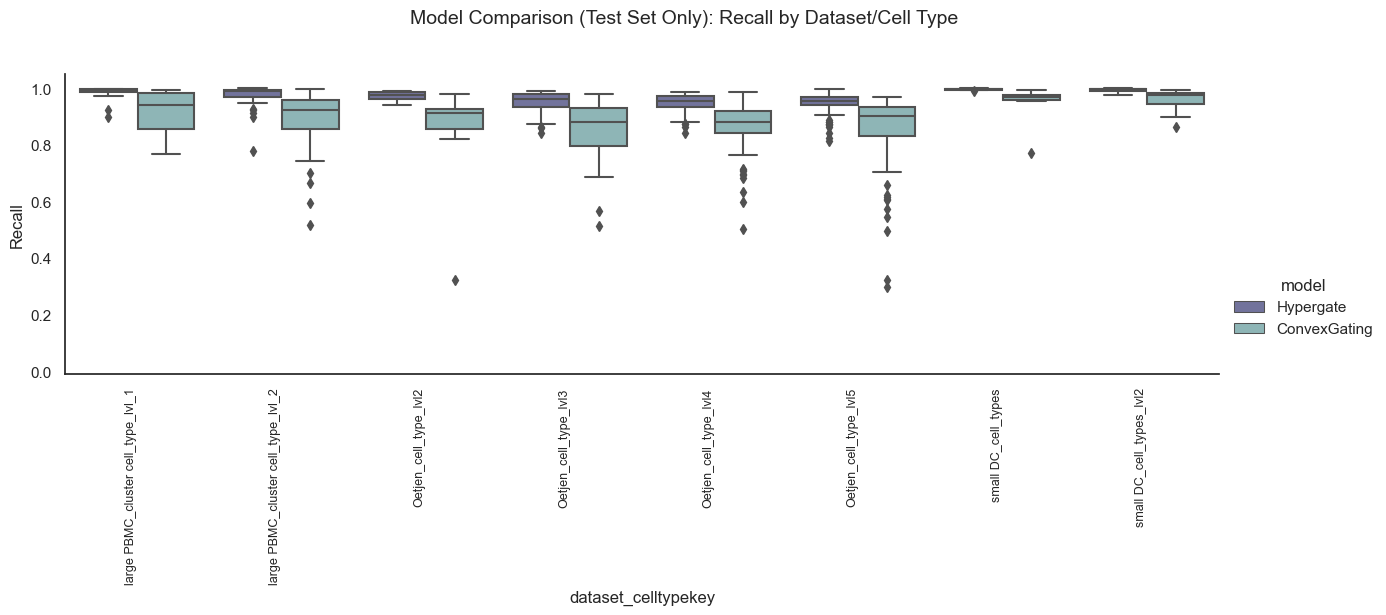

In [93]:
sns.set(style="white")

# Loop over the 3 score types and plot each one separately
for score in ['f1', 'precision', 'recall']:
    df_score = df_melted_test[df_melted_test['score_type'] == score]

    g = sns.catplot(
        data=df_score,
        x='dataset_celltypekey',
        y='score_value',
        hue='model',
        kind='box',
        palette=custom_palette,
        height=5,
        aspect=2.5  # Wider for readability
    )

    g.set_xticklabels(rotation=90, ha='right', fontsize=9)
    g.set_ylabels(score.capitalize())
    g.set(ylim=(-0.01, 1.05))
    g.fig.subplots_adjust(top=0.85, bottom=0.25)  # Extra bottom space for long labels
    g.fig.suptitle(f'Model Comparison (Test Set Only): {score.capitalize()} by Dataset/Cell Type', fontsize=14)
    g.savefig(os.path.join(base_save_path_rev10,pre + '_boxplot_1to1_Hyp_CG_' + score + '.pdf'),bbox_inches = 'tight')
    plt.show()

In [95]:
os.path.join(base_save_path_rev10,pre + '_df_melted_1to1_Hyp_CG.csv')

'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev10_NatComm\\rev10_NatComm_df_melted_1to1_Hyp_CG.csv'

In [96]:
df_melted_test.to_csv(os.path.join(base_save_path_rev10,pre + '_df_melted_1to1_Hyp_CG.csv'))

## 1:15

In [97]:
base_path_1to15 = 'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev09_NatComm\\input\\ratio_1to15'

In [98]:
#large PBMC lvl1
df_Hypergate_largePBMC_lvl1 = pd.read_csv(os.path.join(base_path_1to15,'HIV_data_annotated_final_cluster cell_type_lvl_1_hypergate.csv'))
df_Hypergate_largePBMC_lvl1 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_largePBMC_lvl1,
                                                         dataset = 'large PBMC',
                                                        cell_type_key = 'cluster cell_type_lvl_1')

#large PBMC lvl1
df_Hypergate_largePBMC_lvl2 = pd.read_csv(os.path.join(base_path_1to15,'HIV_data_annotated_final_cluster cell_type_lvl_2_hypergate.csv'))
df_Hypergate_largePBMC_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_largePBMC_lvl2,
                                                         dataset = 'large PBMC',
                                                        cell_type_key = 'cluster cell_type_lvl_2')

df_Hypergate_Oetjen_lvl2 = pd.read_csv(os.path.join(base_path_1to15,'cytof_data_tmp_cell_type_lvl2_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl2,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl2')

df_Hypergate_Oetjen_lvl3 = pd.read_csv(os.path.join(base_path_1to15,'cytof_data_tmp_cell_type_lvl3_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl3 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl3,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl3')

df_Hypergate_Oetjen_lvl4 = pd.read_csv(os.path.join(base_path_1to15,'cytof_data_tmp_cell_type_lvl4_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl4 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl4,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl4')

df_Hypergate_Oetjen_lvl5 = pd.read_csv(os.path.join(base_path_1to15,'cytof_data_tmp_cell_type_lvl5_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl5 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl5,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl5')

df_Hypergate_smallDC_lvl1 = pd.read_csv(os.path.join(base_path_1to15,'mono_merge_annotated_cell_types_hypergate(2).csv'))
df_Hypergate_smallDC_lvl1 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_smallDC_lvl1,
                                                         dataset = 'small DC',
                                                        cell_type_key = 'cell_types')

df_Hypergate_smallDC_lvl2 = pd.read_csv(os.path.join(base_path_1to15,'mono_merge_annotated_cell_types_lvl2_hypergate(2).csv'))
df_Hypergate_smallDC_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_smallDC_lvl2,
                                                         dataset = 'small DC',
                                                        cell_type_key = 'cell_types_lvl2')

In [99]:
# 4 methods to compare
df_Hypergate_1to15 = pd.concat([
    df_Hypergate_largePBMC_lvl1,
    df_Hypergate_largePBMC_lvl2,
    df_Hypergate_Oetjen_lvl2,
    df_Hypergate_Oetjen_lvl3,
    df_Hypergate_Oetjen_lvl4,
    df_Hypergate_Oetjen_lvl5,
    df_Hypergate_smallDC_lvl1,
    df_Hypergate_smallDC_lvl2
], ignore_index=True)
df_linSVM_1to15 = pd.read_csv(os.path.join(base_path_1to15,'performance_linearSVM_ratio_1_to_15.csv'),index_col=0)
df_linSVM_1to15['dataset'] = df_linSVM_1to15['dataset'].replace('cytof_data_tmp', 'Oetjen')

df_CG_1to15 = pd.read_csv(os.path.join(base_path_1to15,'performance_cg_ratio_1_to_15.csv'),index_col=0) 
df_CG_1to15 = df_CG_1to15.rename(columns={'cluster': 'celltype'})
df_CG_1to15 = df_CG_1to15.drop(columns=['hierarchy'])

df_rbfSVM_1to15 = pd.read_csv(os.path.join(base_path_1to15,'performance_RBFSVM_ratio_1_to_15.csv'),index_col=0) 
df_rbfSVM_1to15['dataset'] = df_rbfSVM_1to15['dataset'].replace('cytof_data_tmp', 'Oetjen')

df_all_1to15 = pd.concat([df_Hypergate_1to15,df_linSVM_1to15,df_CG_1to15,df_rbfSVM_1to15])

In [100]:
df_all_1to15_test = df_all_1to15[(df_all_1to15['set'] == 'test') & ((df_all_1to15['model'] == 'ConvexGating') | (df_all_1to15['model'] == 'Hypergate'))]
df_all_1to15_test
df_all_1to15_test['dataset_celltypekey'] = list(df_all_1to15_test['dataset'].values + '_' + df_all_1to15_test['cell_type_key'].values)

C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_27136\1189311188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_1to15_test['dataset_celltypekey'] = list(df_all_1to15_test['dataset'].values + '_' + df_all_1to15_test['cell_type_key'].values)


In [101]:
df_melted_test = pd.melt(
    df_all_1to15_test,
    id_vars=['dataset_celltypekey', 'celltype', 'model', 'set'],
    value_vars=['precision', 'recall', 'f1'],
    var_name='score_type',
    value_name='score_value'
)

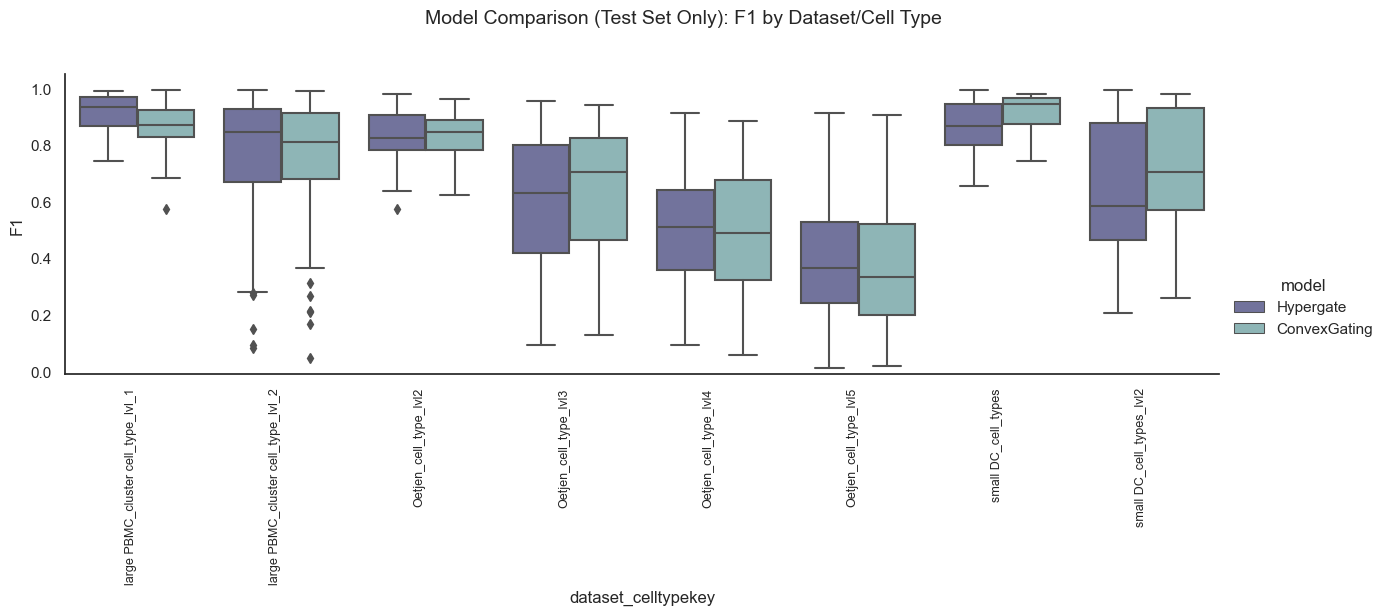

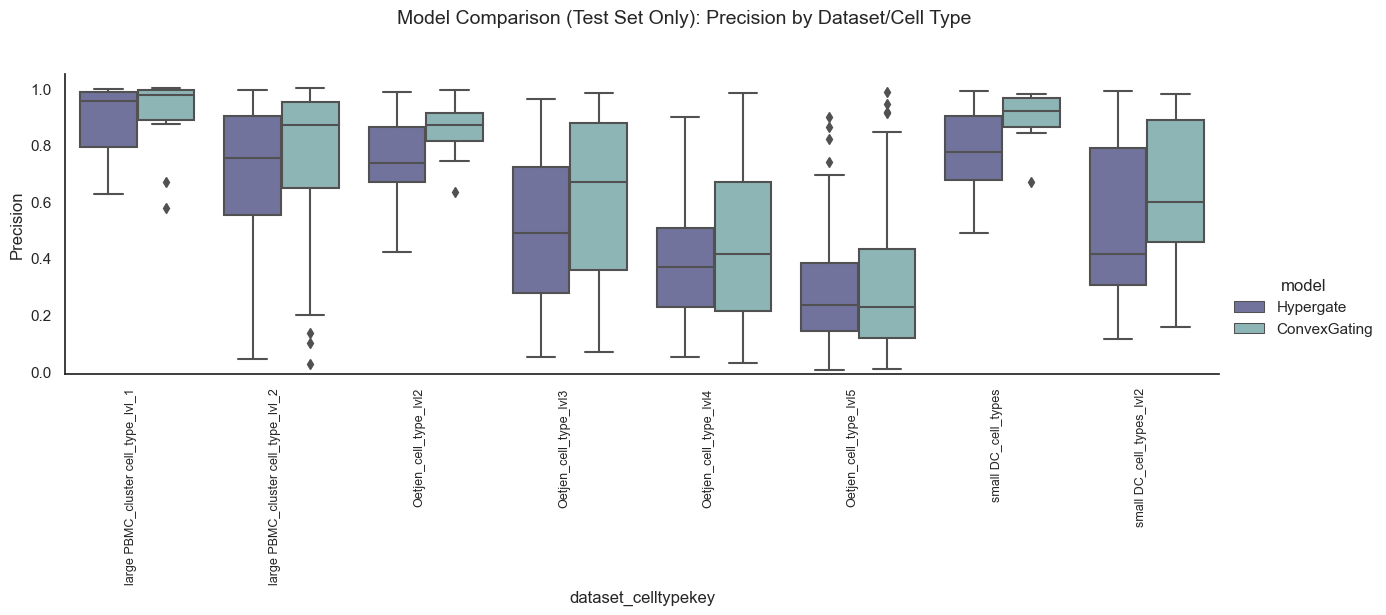

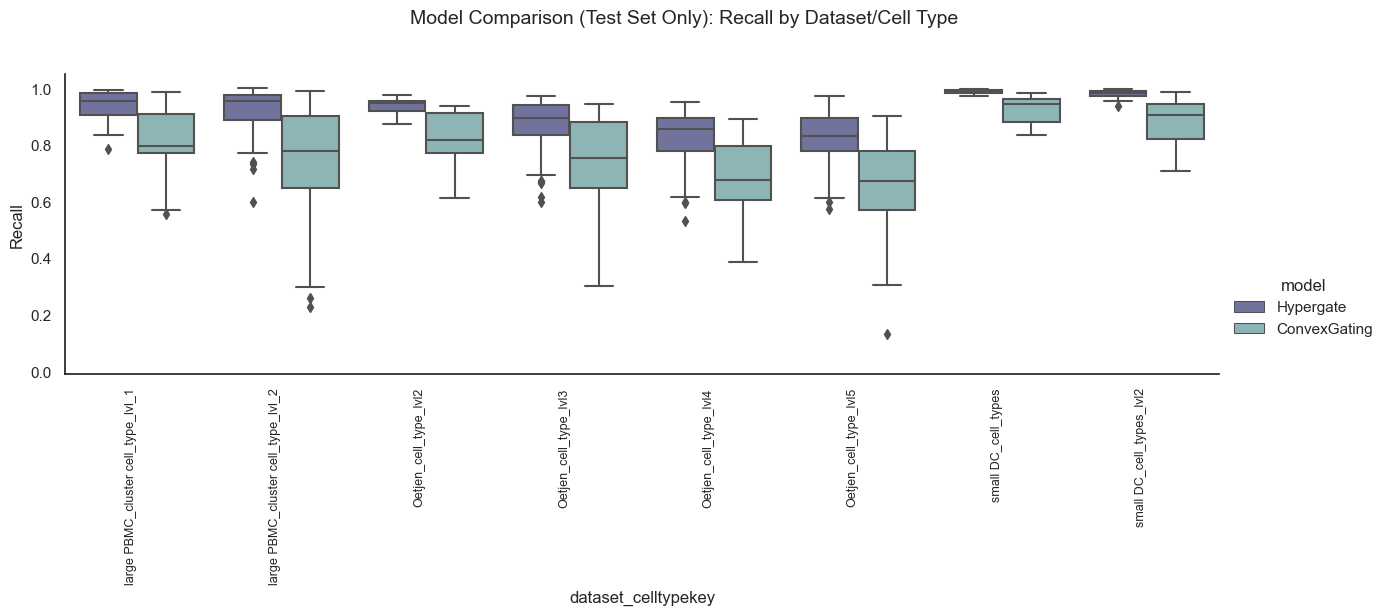

In [102]:
sns.set(style="white")

# Loop over the 3 score types and plot each one separately
for score in ['f1', 'precision', 'recall']:
    df_score = df_melted_test[df_melted_test['score_type'] == score]

    g = sns.catplot(
        data=df_score,
        x='dataset_celltypekey',
        y='score_value',
        hue='model',
        kind='box',
        palette=custom_palette,
        height=5,
        aspect=2.5  # Wider for readability
    )

    g.set_xticklabels(rotation=90, ha='right', fontsize=9)
    g.set_ylabels(score.capitalize())
    g.set(ylim=(-0.01, 1.05))
    g.fig.subplots_adjust(top=0.85, bottom=0.25)  # Extra bottom space for long labels
    g.fig.suptitle(f'Model Comparison (Test Set Only): {score.capitalize()} by Dataset/Cell Type', fontsize=14)
    g.savefig(os.path.join(base_save_path_rev10,pre + '_boxplot_1to15_Hyp_CG_' + score + '.pdf'),bbox_inches = 'tight')
    plt.show()

In [103]:
df_melted_test.to_csv(os.path.join(base_save_path_rev10,pre + '_df_melted_1to15_Hyp_CG.csv'))

## 1 to 1 all

In [104]:
df_all_1to1_test = df_all_1to1[(df_all_1to1['set'] == 'test')]
df_all_1to1_test
df_all_1to1_test['dataset_celltypekey'] = list(df_all_1to1_test['dataset'].values + '_' + df_all_1to1_test['cell_type_key'].values)

C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_27136\3194503628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_1to1_test['dataset_celltypekey'] = list(df_all_1to1_test['dataset'].values + '_' + df_all_1to1_test['cell_type_key'].values)


In [105]:
df_melted_test = pd.melt(
    df_all_1to1_test,
    id_vars=['dataset_celltypekey', 'celltype', 'model', 'set'],
    value_vars=['precision', 'recall', 'f1'],
    var_name='score_type',
    value_name='score_value'
)

In [117]:
custom_palette = {
    'Hypergate': "#6b6ca3",      # blue
    'ConvexGating':  "#87bcbd",   # orange
    'linear SVM':  "#99610a",         # green
    'RBF SVM':  "#c38f16"          # red
}

In [118]:
hue_order = ['Hypergate', 'ConvexGating', 'linear SVM', 'RBF SVM']

In [113]:
df_melted_test['model'].value_counts()


Hypergate       978
linear SVM      978
ConvexGating    978
RBF SVM         978
Name: model, dtype: int64

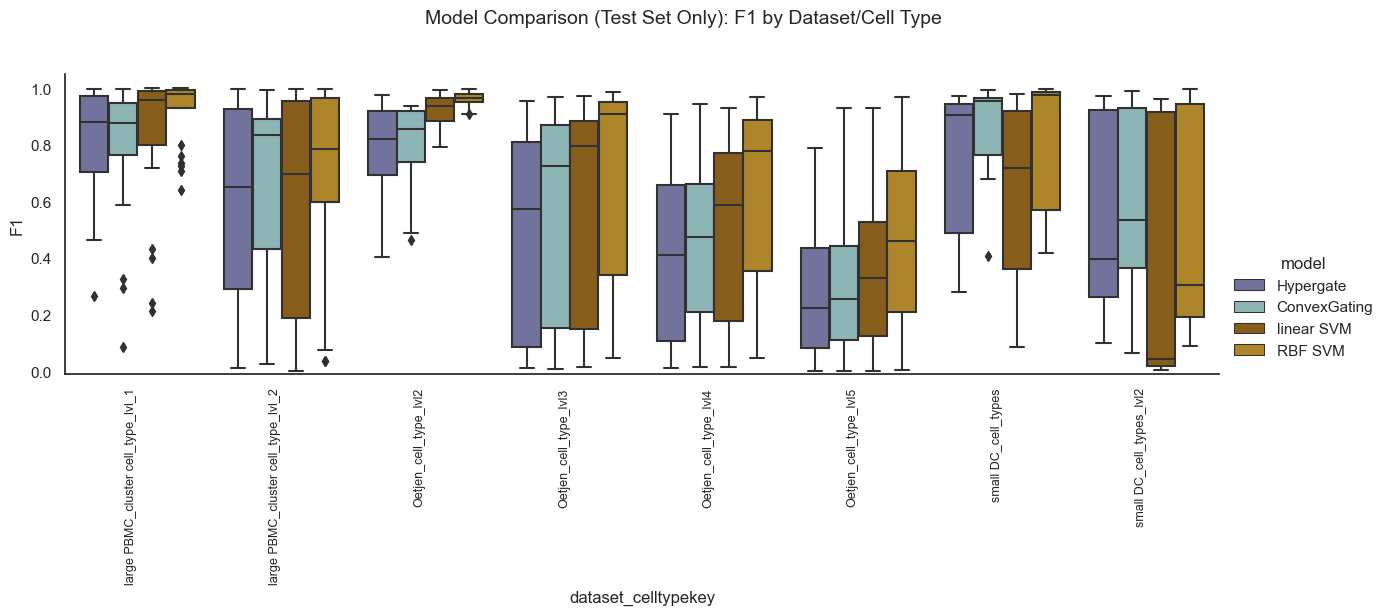

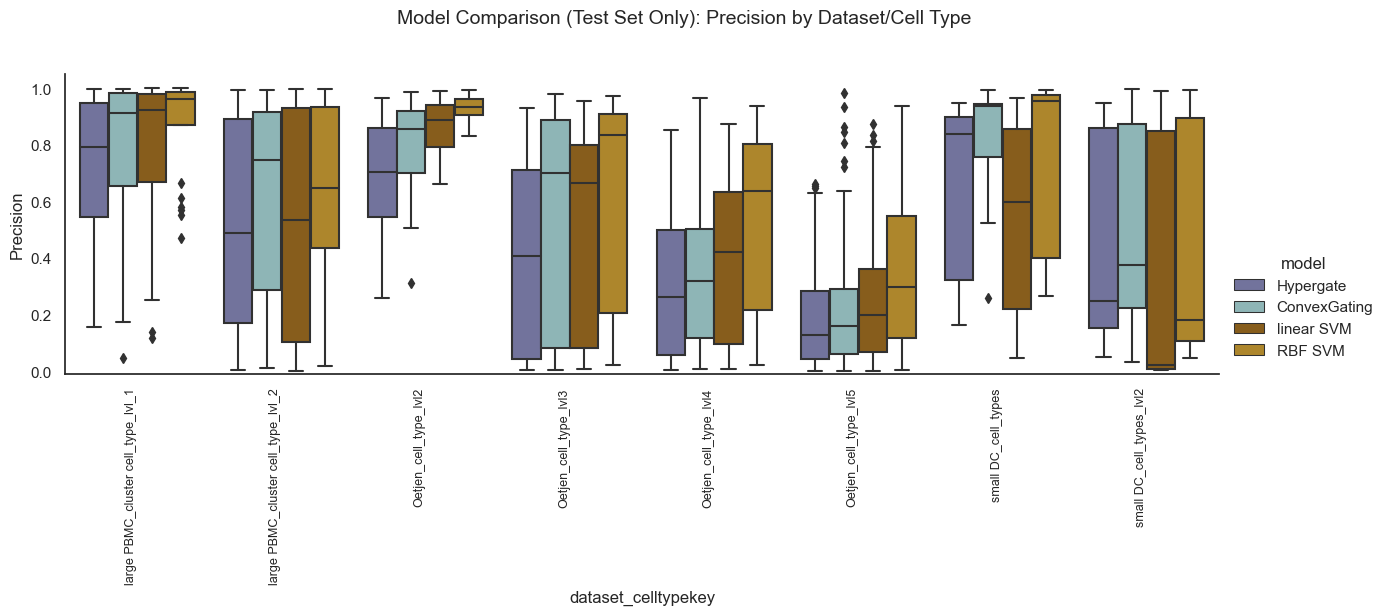

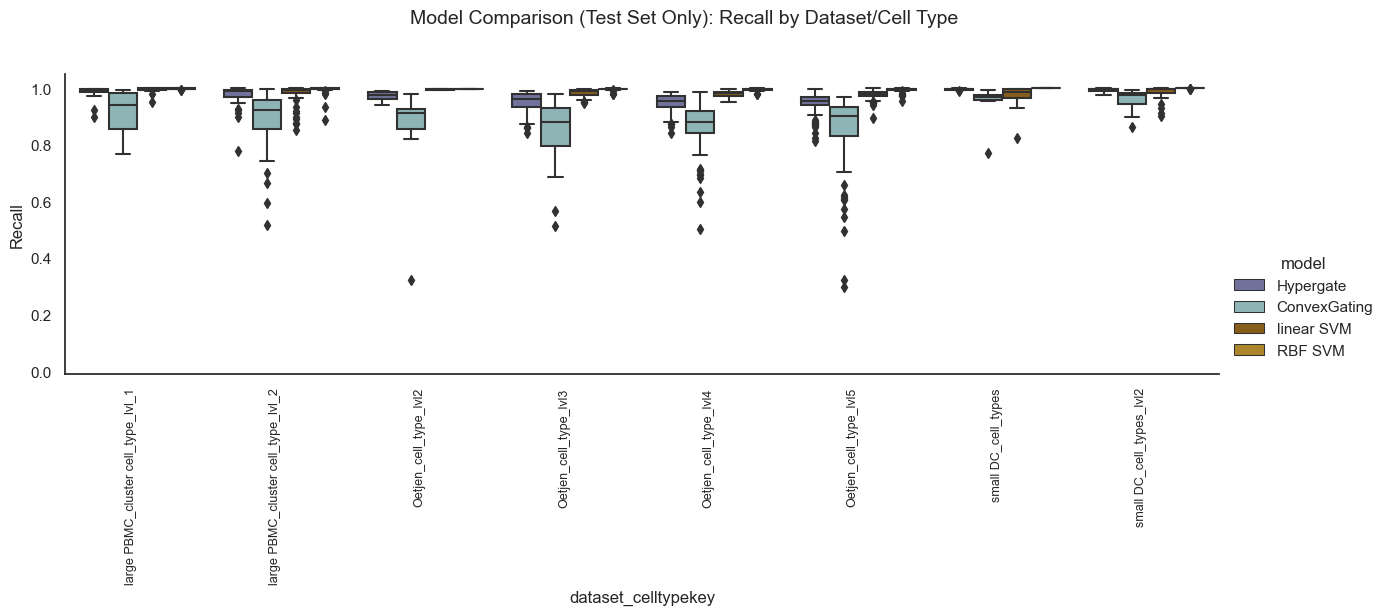

In [120]:
sns.set(style="white")

# Loop over the 3 score types and plot each one separately
for score in ['f1', 'precision', 'recall']:
    df_score = df_melted_test[df_melted_test['score_type'] == score]

    g = sns.catplot(
        data=df_score,
        x='dataset_celltypekey',
        y='score_value',
        hue='model',
        kind='box',
        palette=custom_palette,
        hue_order=hue_order,
        height=5,
        aspect=2.5  # Wider for readability
    )

    g.set_xticklabels(rotation=90, ha='right', fontsize=9)
    g.set_ylabels(score.capitalize())
    g.set(ylim=(-0.01, 1.05))
    g.fig.subplots_adjust(top=0.85, bottom=0.25)  # Extra bottom space for long labels
    g.fig.suptitle(f'Model Comparison (Test Set Only): {score.capitalize()} by Dataset/Cell Type', fontsize=14)
    g.savefig(os.path.join(base_save_path_rev10,pre + '_boxplot_1to1_all_' + score + '.pdf'),bbox_inches = 'tight')
    plt.show()

In [121]:
df_melted_test.to_csv(os.path.join(base_save_path_rev10,pre + '_df_melted_1to1_all.csv'))

## 1 to 15

C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_27136\1782844061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_1to15_test['dataset_celltypekey'] = list(df_all_1to15_test['dataset'].values + '_' + df_all_1to15_test['cell_type_key'].values)


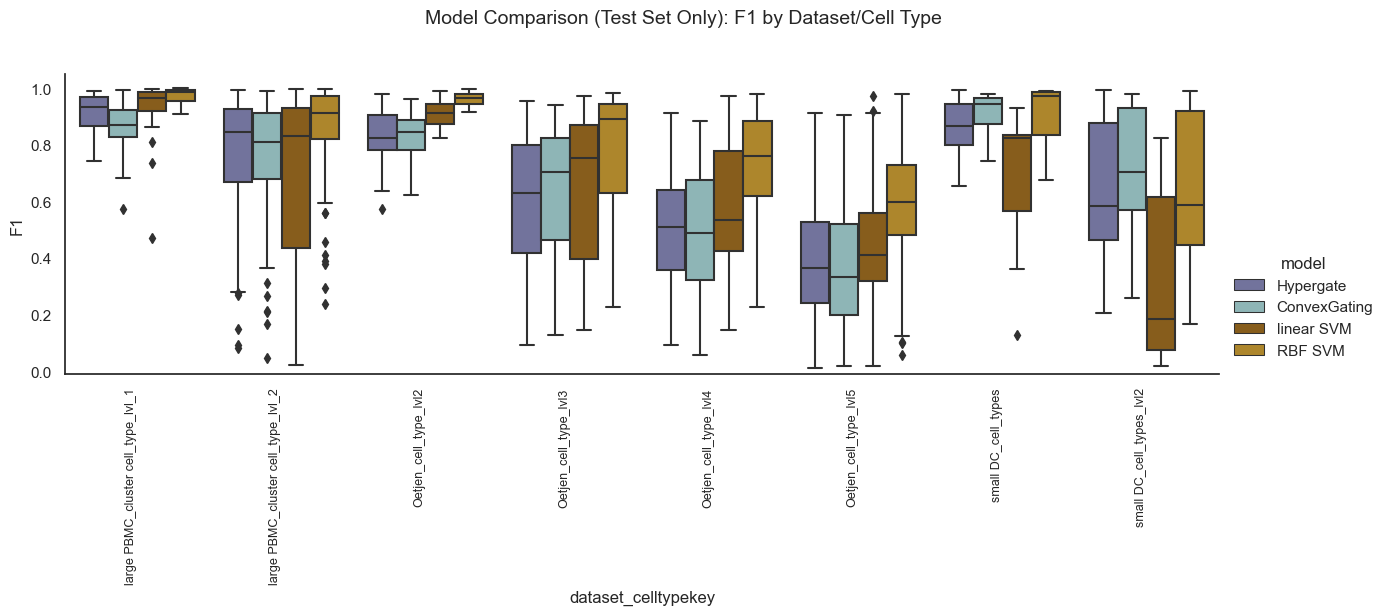

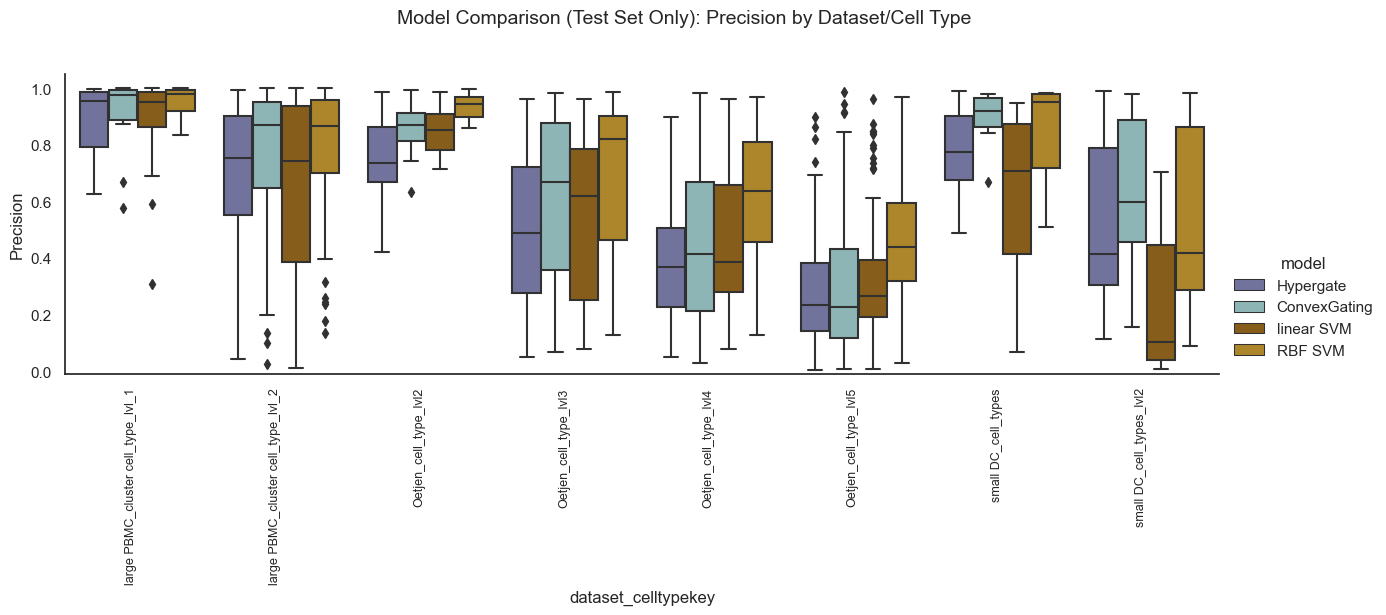

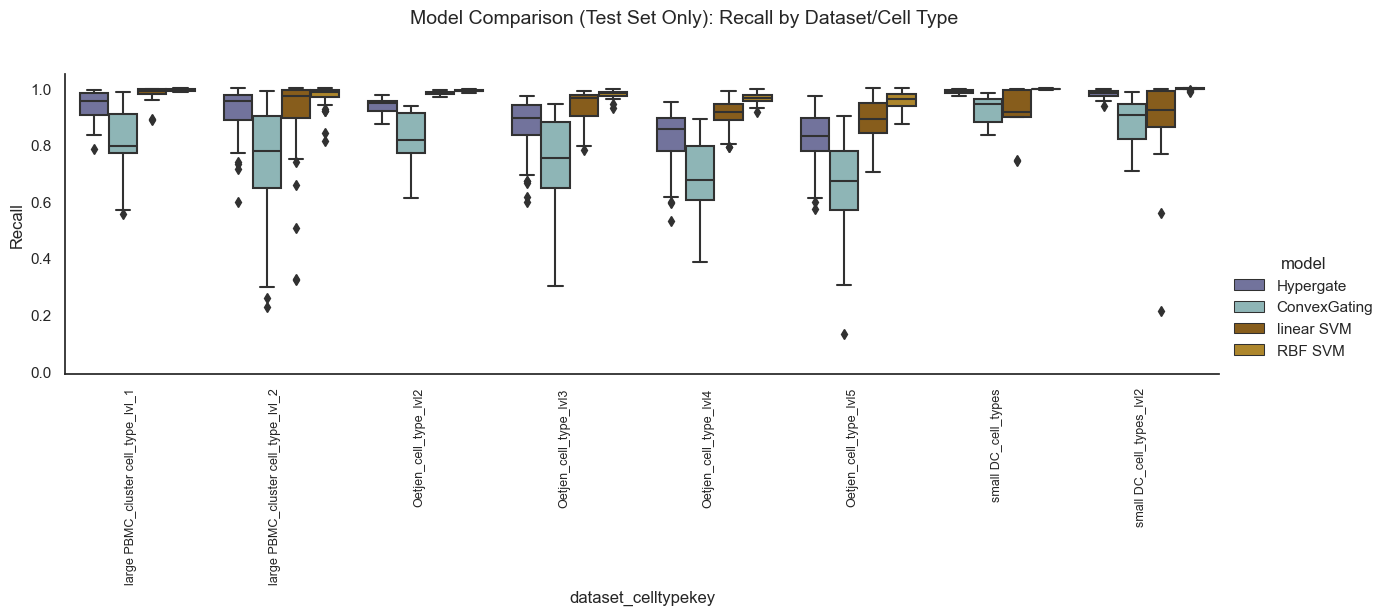

In [123]:
df_all_1to15_test = df_all_1to15[(df_all_1to15['set'] == 'test')]
df_all_1to15_test
df_all_1to15_test['dataset_celltypekey'] = list(df_all_1to15_test['dataset'].values + '_' + df_all_1to15_test['cell_type_key'].values)

df_melted_test = pd.melt(
    df_all_1to15_test,
    id_vars=['dataset_celltypekey', 'celltype', 'model', 'set'],
    value_vars=['precision', 'recall', 'f1'],
    var_name='score_type',
    value_name='score_value'
)

custom_palette = {
    'Hypergate': "#6b6ca3",      # blue
    'ConvexGating':  "#87bcbd",   # orange
    'linear SVM':  "#99610a",         # green
    'RBF SVM':  "#c38f16"          # red
}

hue_order = ['Hypergate', 'ConvexGating', 'linear SVM', 'RBF SVM']

sns.set(style="white")

# Loop over the 3 score types and plot each one separately
for score in ['f1', 'precision', 'recall']:
    df_score = df_melted_test[df_melted_test['score_type'] == score]

    g = sns.catplot(
        data=df_score,
        x='dataset_celltypekey',
        y='score_value',
        hue='model',
        kind='box',
        palette=custom_palette,
        hue_order=hue_order,
        height=5,
        aspect=2.5  # Wider for readability
    )

    g.set_xticklabels(rotation=90, ha='right', fontsize=9)
    g.set_ylabels(score.capitalize())
    g.set(ylim=(-0.01, 1.05))
    g.fig.subplots_adjust(top=0.85, bottom=0.25)  # Extra bottom space for long labels
    g.fig.suptitle(f'Model Comparison (Test Set Only): {score.capitalize()} by Dataset/Cell Type', fontsize=14)
    g.savefig(os.path.join(base_save_path_rev10,pre + '_boxplot_1to15_all_' + score + '.pdf'),bbox_inches = 'tight')
    plt.show()

In [ ]:
df_melted_test.to_csv(os.path.join(base_save_path_rev10,pre + '_df_melted_1to15_all.csv'))